<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%201%3A%20Linear%20Regression%20with%20TensorFlow%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned parameters: w = 2.542, b = 3.134
True parameters: w = 3.0, b = 2.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


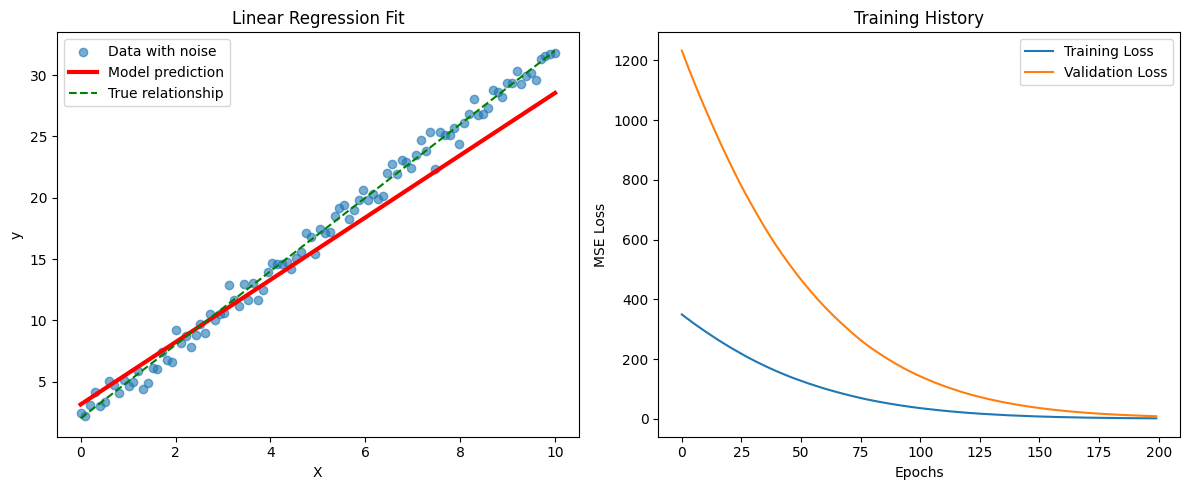

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic training data
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100).astype(np.float32)  # 100 values from 0 to 10
y = 3 * X + 2 + np.random.randn(*X.shape).astype(np.float32) * 0.8  # y = 3x + 2 + noise

# Create and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # Single neuron for linear regression
])

# Use Adam optimizer with a lower learning rate for better convergence
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error for additional insight
)

# Train the model and store history
history = model.fit(
    X, y,
    epochs=200,
    verbose=0,
    validation_split=0.2  # Use 20% of data for validation
)

# Get the learned weights and bias
[w], [b] = model.layers[0].get_weights()
print(f"Learned parameters: w = {w[0]:.3f}, b = {b:.3f}")
print(f"True parameters: w = 3.0, b = 2.0")

# Predict values using the trained model
predictions = model.predict(X)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Data and predictions
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Data with noise', alpha=0.6)
plt.plot(X, predictions, color='red', linewidth=3, label='Model prediction')
plt.plot(X, 3*X + 2, '--', color='green', label='True relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Plot 2: Training history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()

plt.tight_layout()
plt.show()